In [613]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [614]:
data = pd.read_excel("../../Bases/Base_sem_vazios.xlsx")
data

,V0001,V0024,UPA_PNS,V0006_PNS,V0022,A02201|A02305|A02306,C00301,C004,C006,C008,...,P00404,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q074,Q092,Q11006,Q11604
0,11,1110011,110000016,2,4,1,4,5,2,19,...,152.0,0,0,1,12.000000,Fuma atualmente,2,2,2,2
1,11,1110011,110000016,5,2,0,1,1,2,28,...,176.0,1,30,4,-1.000000,Nunca fumou,2,2,2,2
2,11,1110011,110000016,8,4,1,2,2,2,38,...,156.0,0,0,2,24.000000,Fuma atualmente,2,2,2,2
3,11,1110011,110000016,12,1,2,1,1,1,36,...,172.0,2,60,4,-1.000000,Nunca fumou,2,2,2,2
4,11,1110011,110000034,4,3,0,1,1,1,42,...,185.0,3,90,3,15.733784,1-5,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,53,5310220,530041727,12,4,2,1,1,1,41,...,159.0,0,0,4,-1.000000,Nunca fumou,2,2,2,2
43012,53,5310220,530041727,14,3,0,1,1,1,21,...,178.0,0,0,1,12.000000,Fuma atualmente,2,2,2,2
43013,53,5310220,530044434,6,5,2,2,2,1,44,...,162.0,0,0,4,-1.000000,Nunca fumou,2,2,2,2
43014,53,5310220,530044434,8,6,3,1,1,2,26,...,150.0,0,0,4,-1.000000,Nunca fumou,1,2,2,2


In [615]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43016 entries, 0 to 43015
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   V0001                        43016 non-null  int64  
 1   V0024                        43016 non-null  int64  
 2   UPA_PNS                      43016 non-null  int64  
 3   V0006_PNS                    43016 non-null  int64  
 4   V0022                        43016 non-null  int64  
 5   A02201|A02305|A02306         43016 non-null  int64  
 6   C00301                       43016 non-null  int64  
 7   C004                         43016 non-null  int64  
 8   C006                         43016 non-null  int64  
 9   C008                         43016 non-null  int64  
 10  C009                         43016 non-null  int64  
 11  L01701                       0 non-null      float64
 12  L018                         0 non-null      float64
 13  M01601          

## Pequena analise

In [616]:
def grafico_dist(col1, col2):
    # 1. Criar uma tabela de contingência (crosstab) entre 'Q074' e 'V0022'
    cross_tab = pd.crosstab(data[col1],data[col2], normalize='index') * 100

    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
    
    # 3. Adicionar os valores de porcentagem nas barras
    for container in ax.containers:
        # Ajustar a posição do texto para evitar sobreposição
        ax.bar_label(
            container,
            label_type='center',
            fmt='%.1f%%',  # Formato: 1 casa decimal + '%'
            padding=0,
            color='white',  # Cor do texto (pode ajustar)
            fontsize=8
        )

    plt.title(f'Distribuição Percentual de {col1} por Q074', pad=20)
    plt.ylabel('Porcentagem (%)')
    plt.xlabel(col1)
    plt.tight_layout()  # Melhorar espaçamento
    plt.show()

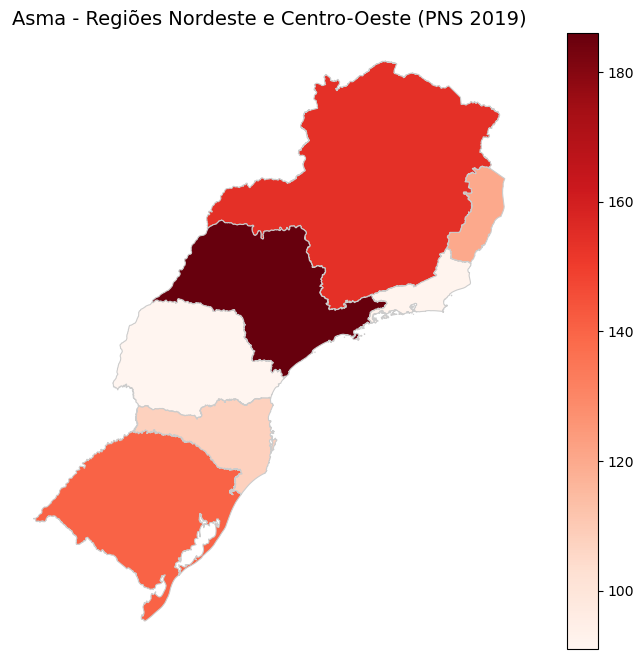

In [617]:


# 1. Carregar os dados da PNS
colunas = ['V0001', 'Q074']
base = data[colunas]

# 2. Filtrar e agrupar casos por estado
doenca_por_estado = base[base['Q074'] == 1].groupby('V0001').size().reset_index(name='Casos')

# 3. Mapear códigos para nomes dos estados
codigos_uf = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro',
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}
doenca_por_estado['UF'] = doenca_por_estado['V0001'].map(codigos_uf)

# 4. Filtrar apenas para os estados desejados
nordeste = [
    'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 
    'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia'
]
centro_oeste = [
    'Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal'
]
norte = [
    'Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 
    'Roraima', 'Tocantins'
]
sul = [
    'Paraná', 'Santa Catarina', 'Rio Grande do Sul'
]
sudeste = [
    'Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'
]

estados_desejados = sudeste+ sul

doenca_por_estado = doenca_por_estado[doenca_por_estado['UF'].isin(estados_desejados)]

# 5. Carregar o mapa GeoJSON
mapa = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# 6. Filtrar o mapa também
mapa = mapa[mapa['name'].isin(estados_desejados)]

# 7. Juntar os dados
mapa = mapa.merge(doenca_por_estado, how='left', left_on='name', right_on='UF')

# 8. Plotar o mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mapa.plot(column='Casos', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Asma - Regiões Nordeste e Centro-Oeste (PNS 2019)', fontsize=14)
ax.axis('off')

# 9. Salvar o gráfico
plt.savefig('../../Graficos/mapa_nordeste_centro_oeste.png', dpi=300)

plt.show()

## Esclusão de colunas

In [618]:
idx_Q11006 = data.loc[data['Q11006'] == 1, 'Q11006'].index
data.drop(index=idx_Q11006, inplace=True)

In [619]:
data.drop(columns=['V0024', 'UPA_PNS', 'V0006_PNS', 'C00301', 'C004', 'L01701', 'L018', 'M01601', 'Q11006'], inplace=True)

## Criação e alteração de colunas

### V0001

In [620]:
estado_para_regiao = {
    11: 'reg1',      # Rondônia
    12: 'reg1',      # Acre
    13: 'reg1',      # Amazonas
    14: 'reg1',      # Roraima
    15: 'reg1',      # Pará
    16: 'reg1',      # Amapá
    17: 'reg1',      # Tocantins
    21: 'reg1',   # Maranhão
    22: 'reg1',   # Piauí
    23: 'reg1',   # Ceará
    24: 'reg1',   # Rio Grande do Norte
    25: 'reg1',   # Paraíba
    26: 'reg1',   # Pernambuco
    27: 'reg1',   # Alagoas
    28: 'reg1',   # Sergipe
    29: 'reg1',   # Bahia
    31: 'reg2',    # Minas Gerais
    32: 'reg2',    # Espírito Santo
    33: 'reg2',    # Rio de Janeiro
    35: 'reg2',    # São Paulo
    41: 'reg2',        # Paraná
    42: 'reg2',        # Santa Catarina
    43: 'reg2',        # Rio Grande do Sul
    50: 'reg1', # Mato Grosso do Sul
    51: 'reg1', # Mato Grosso
    52: 'reg1', # Goiás
    53: 'reg1'  # Distrito Federal
}

# Adicionar a coluna 'Região' ao DataFrame
data['V0001'] = data['V0001'].map(estado_para_regiao)

### IMC

In [621]:
data[['P00104', 'P00404']]

,P00104,P00404
0,65.0,152.0
1,55.0,176.0
2,60.0,156.0
3,80.0,172.0
4,95.0,185.0
...,...,...
43011,74.0,159.0
43012,64.0,178.0
43013,62.0,162.0
43014,75.0,150.0


In [622]:
data['IMC'] = data['P00104']/((data['P00404']/100)**2)
data['IMC']

0        28.133657
1        17.755682
2        24.654832
3        27.041644
4        27.757487
           ...    
43011    29.270994
43012    20.199470
43013    23.624447
43014    33.333333
43015    17.921147
Name: IMC, Length: 40387, dtype: float64

separacao do IMC em faixas, valores das faixas foram retiradas dos dados da OMS

In [623]:
bins = [0, 24.99, 29.99, 100]
labels = ['Normal', 'Sobrepeso', 'Obeso']

data['IMC'] = pd.cut(data['IMC'], bins=bins, labels=labels, right=False)
data['IMC'].value_counts()

IMC
Normal       17594
Sobrepeso    15001
Obeso         7792
Name: count, dtype: int64

In [624]:
print(data.loc[data['IMC'] == 'Normal', 'Q074'].value_counts())
print(data.loc[data['IMC'] == 'Sobrepeso', 'Q074'].value_counts())
print(data.loc[data['IMC'] == 'Obeso', 'Q074'].value_counts())

Q074
2    16783
1      811
Name: count, dtype: int64
Q074
2    14286
1      715
Name: count, dtype: int64
Q074
2    7370
1     422
Name: count, dtype: int64


### V0022

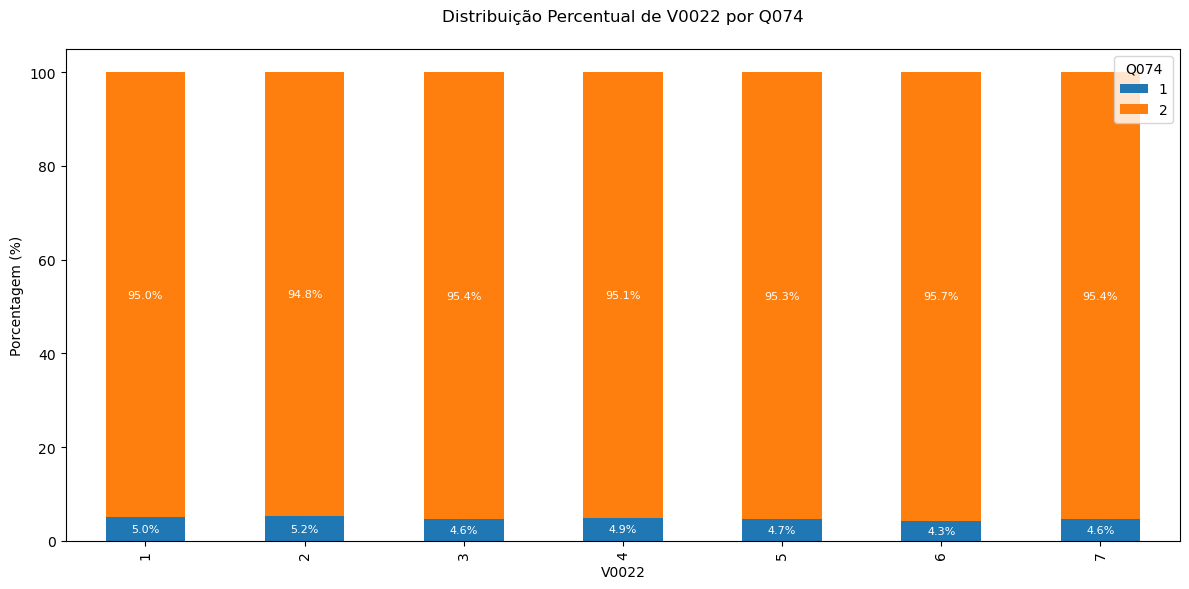

In [625]:
grafico_dist('V0022', 'Q074')

In [626]:
# data['V0022'] = pd.cut(data['V0022'], bins=5, right=False)
# data['V0022'].value_counts()

### A02201|A02305|A02306

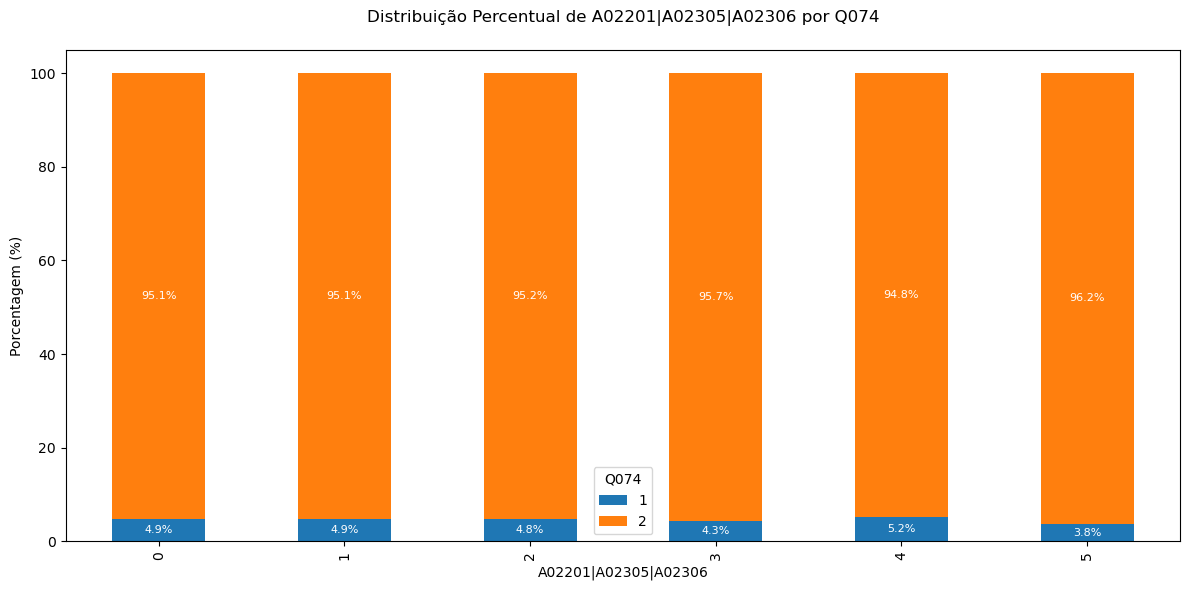

In [627]:
grafico_dist('A02201|A02305|A02306', 'Q074')

In [628]:
# data['A02201|A02305|A02306'] = pd.cut(data['A02201|A02305|A02306'], bins=5, right=False)
# data['A02201|A02305|A02306'].value_counts()

### C008

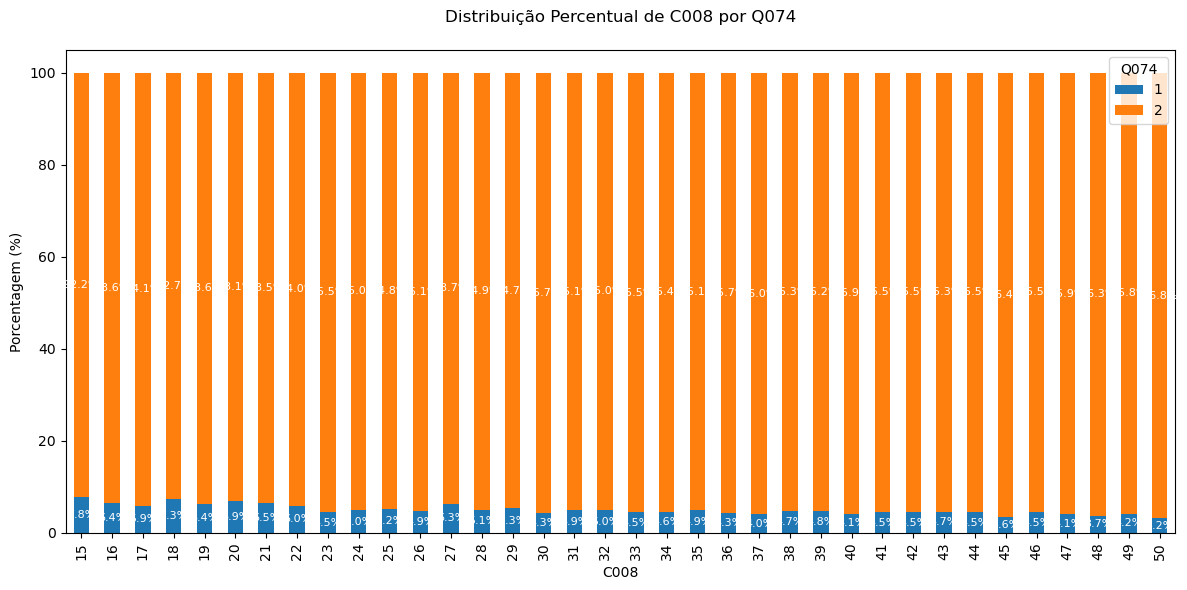

In [629]:
grafico_dist('C008', 'Q074')

In [630]:
# bins = [0, 18, 24, 100]
# labels = ['Adolescente', 'Adulto jovem', 'Adulto']

# data['C008'] = pd.cut(data['C008'], bins=bins, labels=labels, right=False)
# data['C008'].value_counts()

In [631]:
bins = [0, 24, 33, 100]
labels = ['15-24', '25-33', '34+']

data['C008'] = pd.cut(data['C008'], bins=bins, labels=labels, right=False)
data['C008'].value_counts()

C008
34+      23799
25-33    10452
15-24     6136
Name: count, dtype: int64

### C009

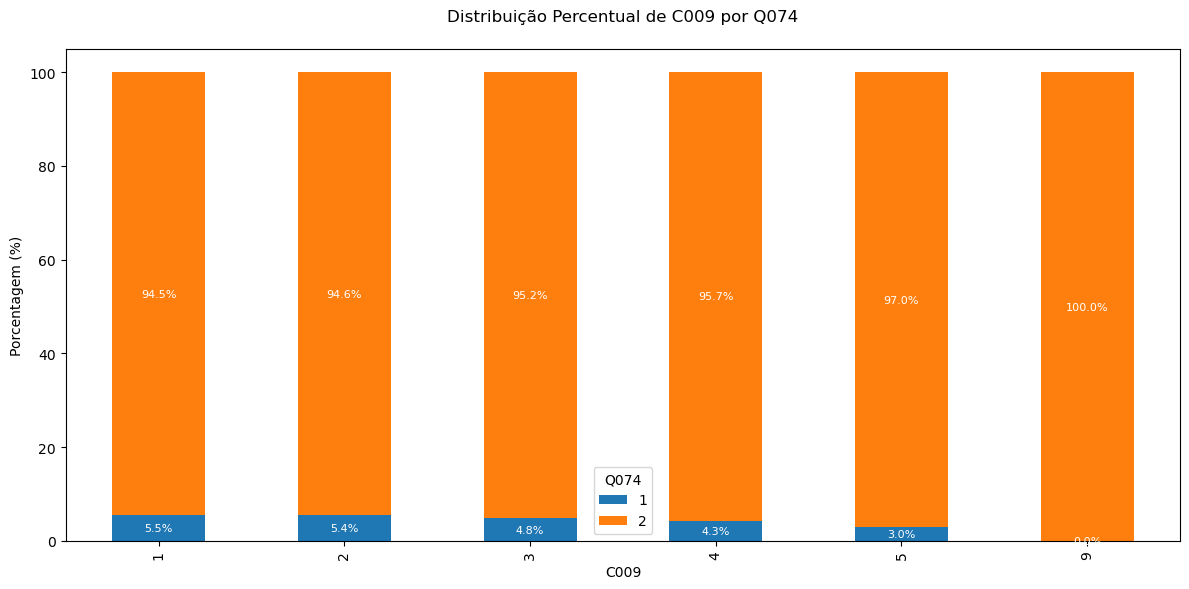

In [632]:
grafico_dist('C009', 'Q074')

In [633]:
ing = data.loc[data['C009'] == 9].index
data.drop(index=ing, inplace=True)

Modificação para separação de pessoas brancas para as que não são

1 = Branco
2 = N_Branco

In [634]:
data['C009'].value_counts()

C009
4    21822
1    13267
2     4699
5      301
3      291
Name: count, dtype: int64

In [635]:
lista = [3,4,5]
data.loc[data['C009'].isin(lista), 'C009'] = 2

### N010

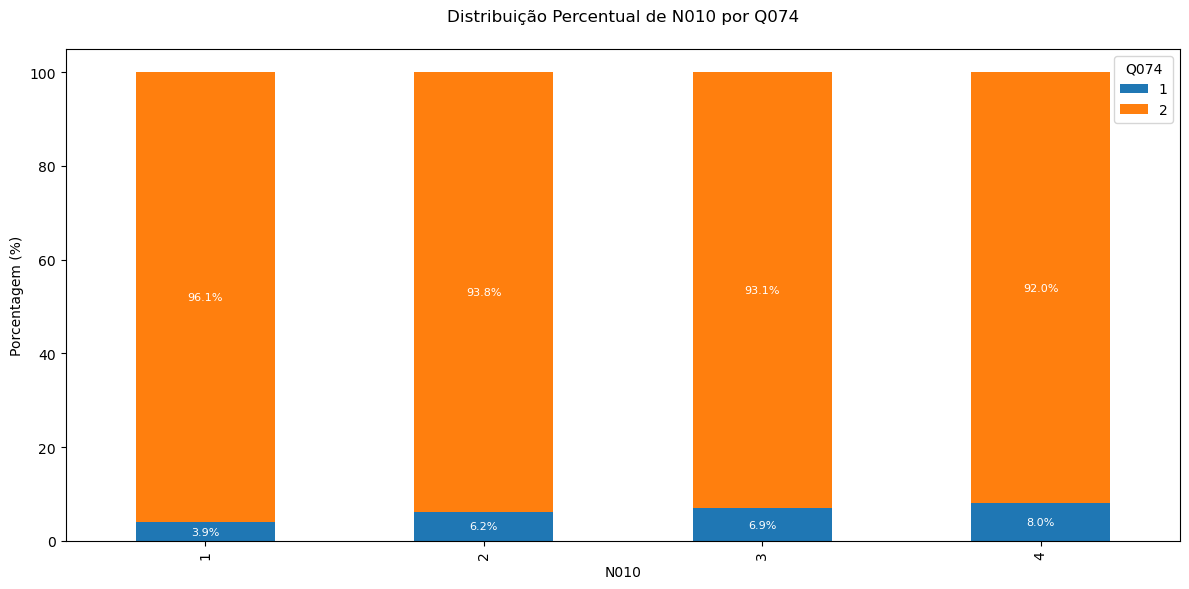

In [636]:
grafico_dist('N010', 'Q074')

Juncao dos valores 2 e 3 pelo resultado do teste chi quadrado

In [637]:
data.loc[data['N010'] == 3, 'N010'] = 2

### P00104

In [638]:
data['P00104'] = pd.cut(data['P00104'], bins=5, right=False)
data['P00104'].value_counts()

P00104
[60.0, 89.0)        26652
[31.0, 60.0)         7883
[89.0, 118.0)        5423
[118.0, 147.0)        404
[147.0, 176.145)       18
Name: count, dtype: int64

### P00404

In [639]:
data['P00404'] = pd.cut(data['P00404'], bins=5, right=False)
data['P00404'].value_counts()

P00404
[161.4, 171.6)      16042
[151.2, 161.4)      10866
[171.6, 181.8)       8988
[141.0, 151.2)       2307
[181.8, 192.051)     2177
Name: count, dtype: int64

### P034|P035

In [640]:
bins = [0, 1, 7]
labels = ['Não pratica', 'pratica']

data['P034|P035'] = pd.cut(data['P034|P035'], bins=bins, labels=labels, right=False)
data['P034|P035'].value_counts()

P034|P035
Não pratica    24795
pratica        14359
Name: count, dtype: int64

### P03701|P03702

In [641]:
bins = [0, 1, 30, 60, 90, 120]
labels = ['Não pratica', '<30', '31-60', '61-90', '91-120']

data['P03701|P03702'] = pd.cut(data['P03701|P03702'], bins=bins, labels=labels, right=False)
data['P03701|P03702'].value_counts()

P03701|P03702
Não pratica    24795
61-90           8458
91-120          3473
31-60           3273
<30              381
Name: count, dtype: int64

### P053

faixas de valores definidas pelo artigo P Vineis

In [642]:
data[['P050|P052','P053']]

,P050|P052,P053
0,1,12.000000
1,4,-1.000000
2,2,24.000000
3,4,-1.000000
4,3,15.733784
...,...,...
43011,4,-1.000000
43012,1,12.000000
43013,4,-1.000000
43014,4,-1.000000


In [643]:
data['P053'].value_counts()

P053
-1.000000     28716
 15.000000     1571
 15.733784     1418
 18.000000     1292
 16.000000     1183
 14.000000     1037
 17.000000      954
 20.000000      803
 12.000000      802
 13.000000      747
 19.000000      419
 10.000000      385
 22.000000      199
 8.000000       167
 11.000000      160
 23.000000      134
 21.000000      131
 9.000000        96
 15.504732       90
 24.000000       76
Name: count, dtype: int64

In [644]:
bins = [-1, 0, 12, 16, 20, 100]
labels = ['Nunca fumou', '<=12', '13-16', '17-20', '21+']

data['P053'] = pd.cut(data['P053'], bins=bins, labels=labels, right=False)
data['P053'].value_counts()

P053
Nunca fumou    28716
13-16           5665
17-20           3848
21+             1343
<=12             808
Name: count, dtype: int64

In [645]:
data[['P050|P052','P053']]

,P050|P052,P053
0,1,13-16
1,4,Nunca fumou
2,2,21+
3,4,Nunca fumou
4,3,13-16
...,...,...
43011,4,Nunca fumou
43012,1,13-16
43013,4,Nunca fumou
43014,4,Nunca fumou


## Exclusão de colunas

In [646]:
# idx_Q11006 = data.loc[data['Q11006'] == 1, 'Q11006'].index
# data.drop(index=idx_Q11006, inplace=True)

idx_V0001 = data.loc[data['V0001'] == 'ger1', 'V0001'].index
data.drop(index=idx_V0001, inplace=True)

In [647]:
data.drop(columns=['V0001'], inplace=True)

## Salvando

In [648]:
data

,V0022,A02201|A02305|A02306,C006,C008,C009,N010,P00104,P00404,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q074,Q092,Q11604,IMC
0,4,1,2,15-24,2,1,"[60.0, 89.0)","[151.2, 161.4)",Não pratica,Não pratica,1,13-16,Fuma atualmente,2,2,2,Sobrepeso
1,2,0,2,25-33,2,1,"[31.0, 60.0)","[171.6, 181.8)",pratica,31-60,4,Nunca fumou,Nunca fumou,2,2,2,Normal
2,4,1,2,34+,1,1,"[60.0, 89.0)","[151.2, 161.4)",Não pratica,Não pratica,2,21+,Fuma atualmente,2,2,2,Normal
3,1,2,1,34+,1,1,"[60.0, 89.0)","[171.6, 181.8)",pratica,61-90,4,Nunca fumou,Nunca fumou,2,2,2,Sobrepeso
4,3,0,1,34+,1,1,"[89.0, 118.0)","[181.8, 192.051)",pratica,91-120,3,13-16,1-5,2,1,2,Sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,4,2,1,34+,2,1,"[60.0, 89.0)","[151.2, 161.4)",Não pratica,Não pratica,4,Nunca fumou,Nunca fumou,2,2,2,Sobrepeso
43012,3,0,1,15-24,2,1,"[60.0, 89.0)","[171.6, 181.8)",Não pratica,Não pratica,1,13-16,Fuma atualmente,2,2,2,Normal
43013,5,2,1,34+,2,2,"[60.0, 89.0)","[161.4, 171.6)",Não pratica,Não pratica,4,Nunca fumou,Nunca fumou,2,2,2,Normal
43014,6,3,2,25-33,2,1,"[60.0, 89.0)","[141.0, 151.2)",Não pratica,Não pratica,4,Nunca fumou,Nunca fumou,1,2,2,Obeso


In [649]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40380 entries, 0 to 43015
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   V0022                        40380 non-null  int64   
 1   A02201|A02305|A02306         40380 non-null  int64   
 2   C006                         40380 non-null  int64   
 3   C008                         40380 non-null  category
 4   C009                         40380 non-null  int64   
 5   N010                         40380 non-null  int64   
 6   P00104                       40380 non-null  category
 7   P00404                       40380 non-null  category
 8   P034|P035                    39154 non-null  category
 9   P03701|P03702                40380 non-null  category
 10  P050|P052                    40380 non-null  int64   
 11  P053                         40380 non-null  category
 12  P05901|P05902|P05903|P05904  40380 non-null  object  
 13  Q074  

## Retirando valores duplicados

In [650]:
# data.drop_duplicates(inplace=True)

In [651]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40380 entries, 0 to 43015
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   V0022                        40380 non-null  int64   
 1   A02201|A02305|A02306         40380 non-null  int64   
 2   C006                         40380 non-null  int64   
 3   C008                         40380 non-null  category
 4   C009                         40380 non-null  int64   
 5   N010                         40380 non-null  int64   
 6   P00104                       40380 non-null  category
 7   P00404                       40380 non-null  category
 8   P034|P035                    39154 non-null  category
 9   P03701|P03702                40380 non-null  category
 10  P050|P052                    40380 non-null  int64   
 11  P053                         40380 non-null  category
 12  P05901|P05902|P05903|P05904  40380 non-null  object  
 13  Q074  

In [652]:
data.to_excel("../../Bases/Base_tratada.xlsx", index=False)